   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

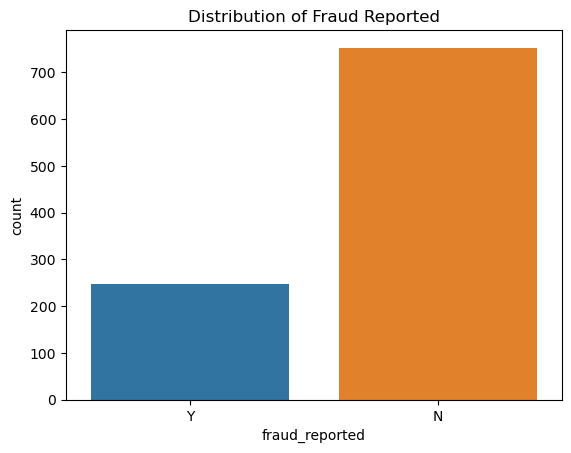

Accuracy: 0.735
Confusion Matrix:
 [[135  10]
 [ 43  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       145
           1       0.55      0.22      0.31        55

    accuracy                           0.73       200
   macro avg       0.65      0.57      0.57       200
weighted avg       0.70      0.73      0.69       200



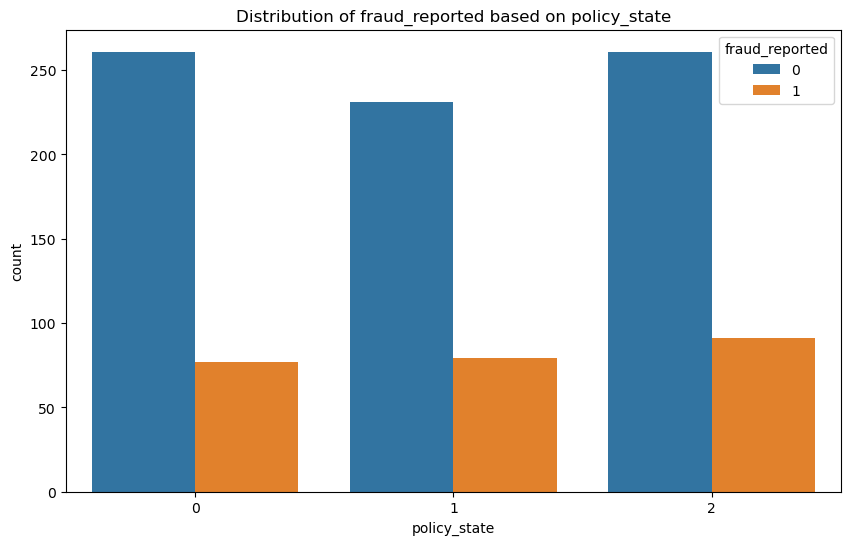

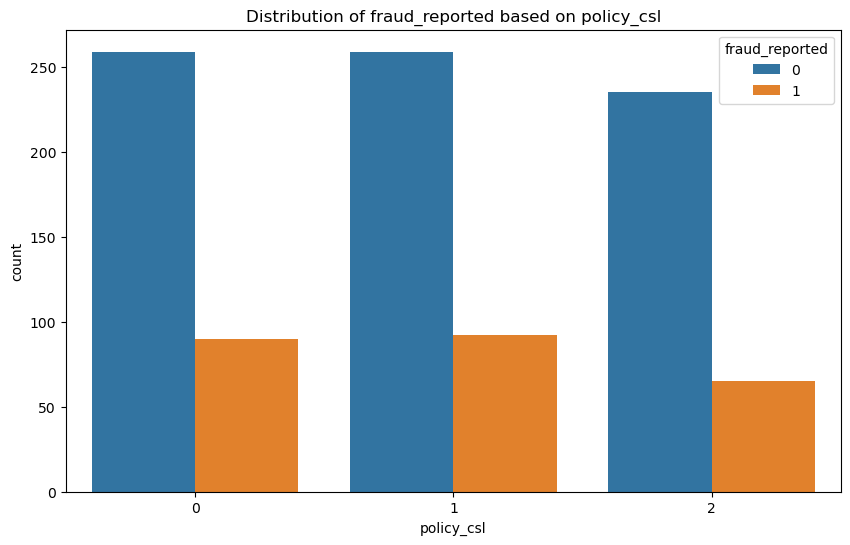

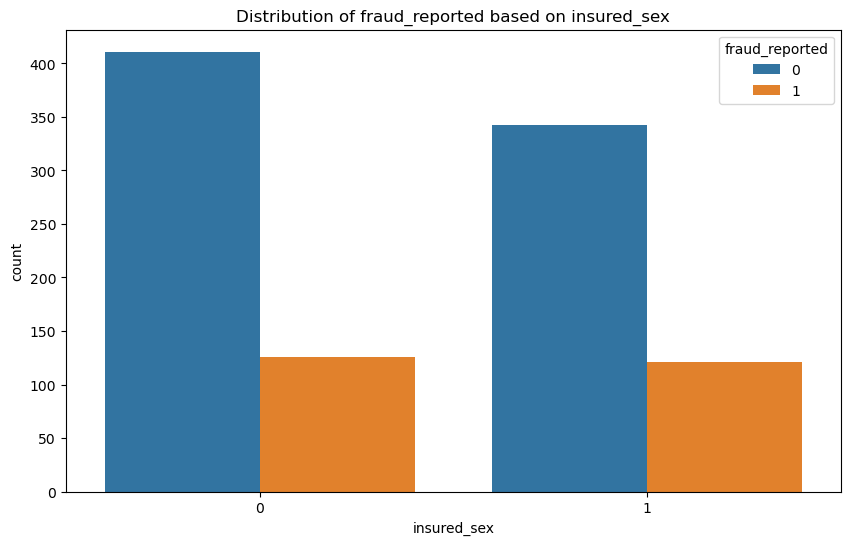

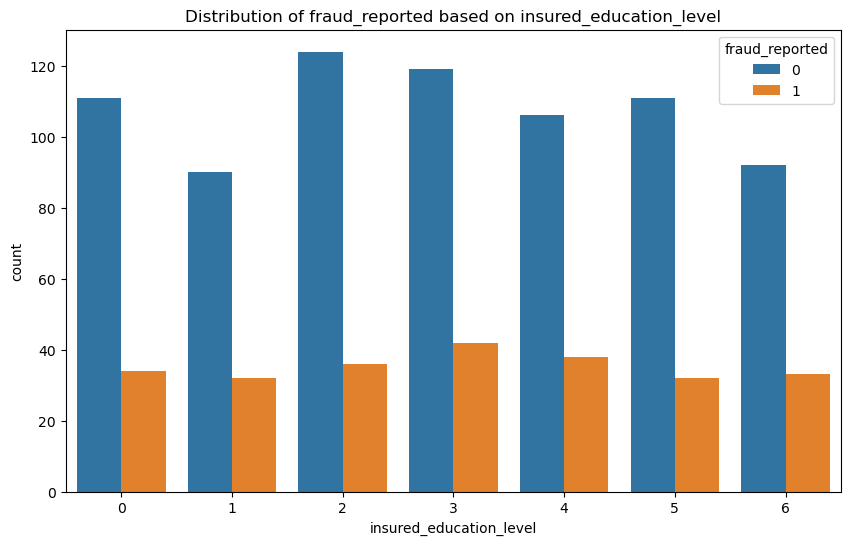

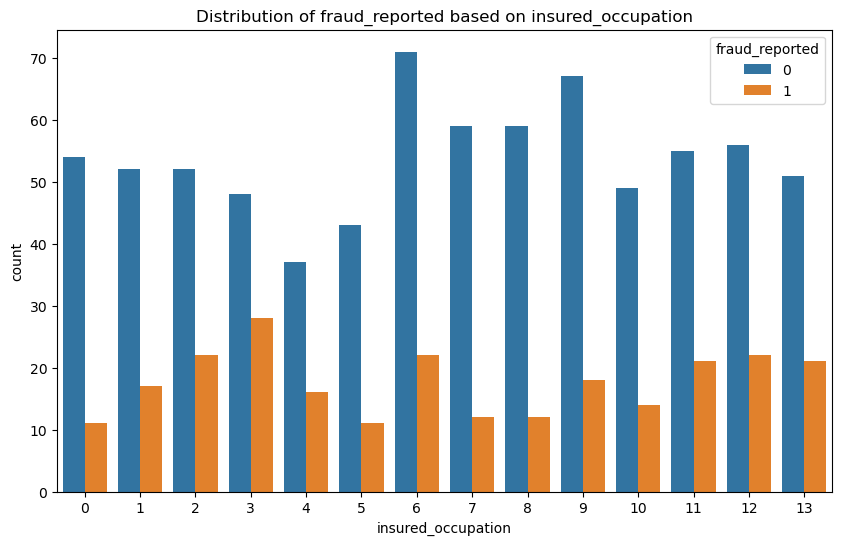

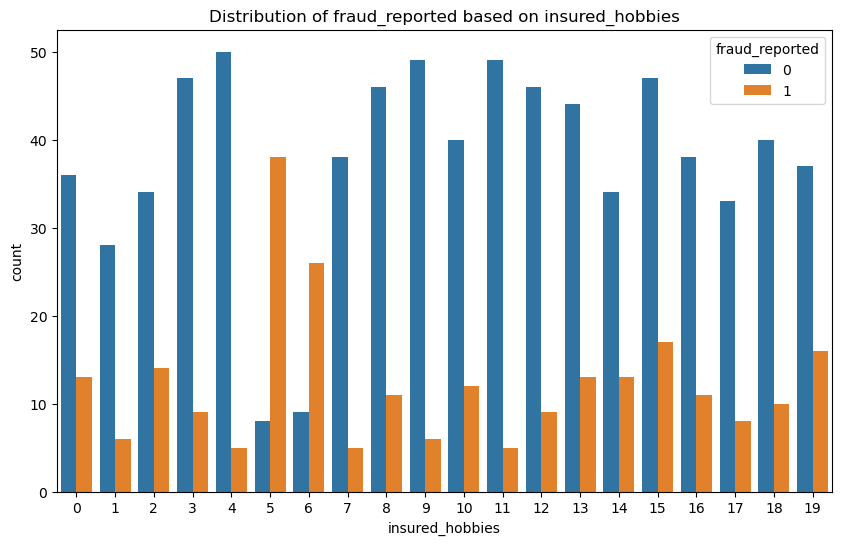

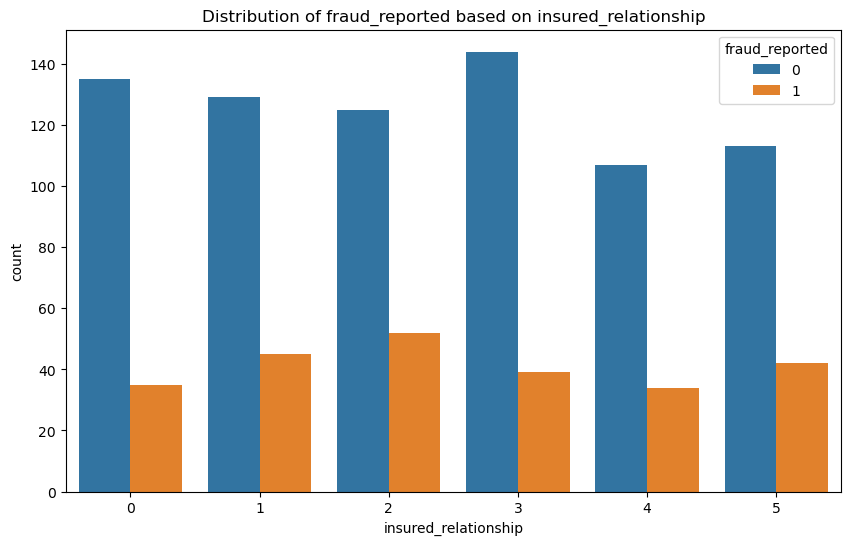

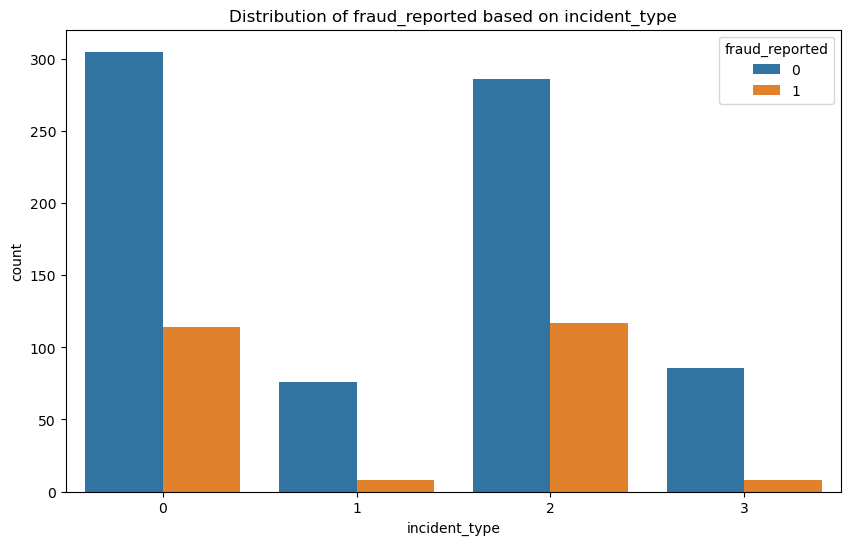

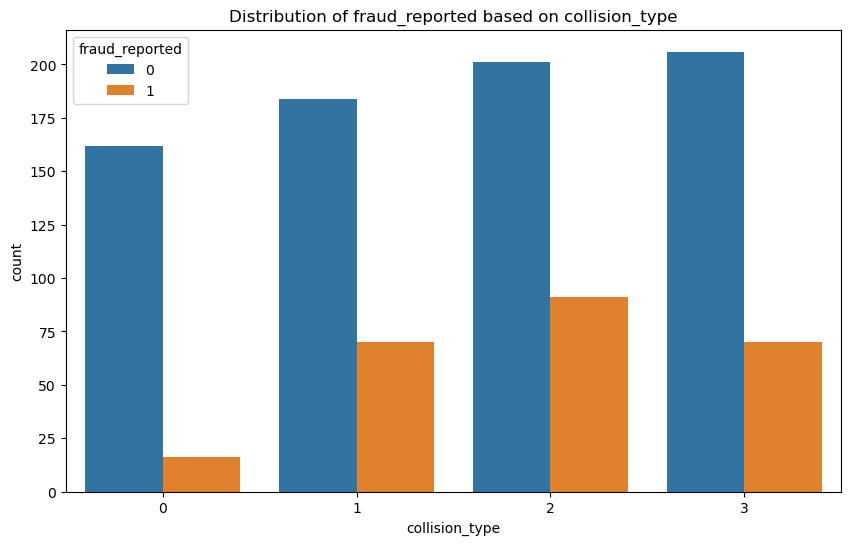

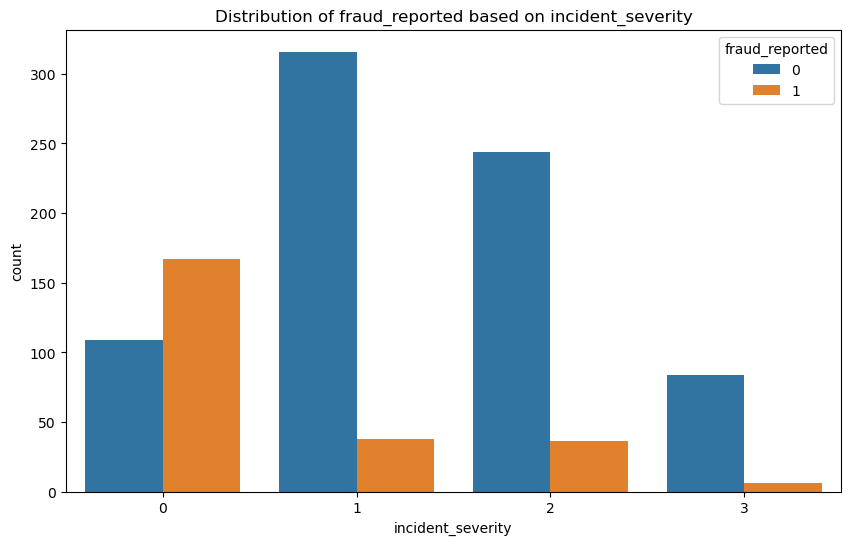

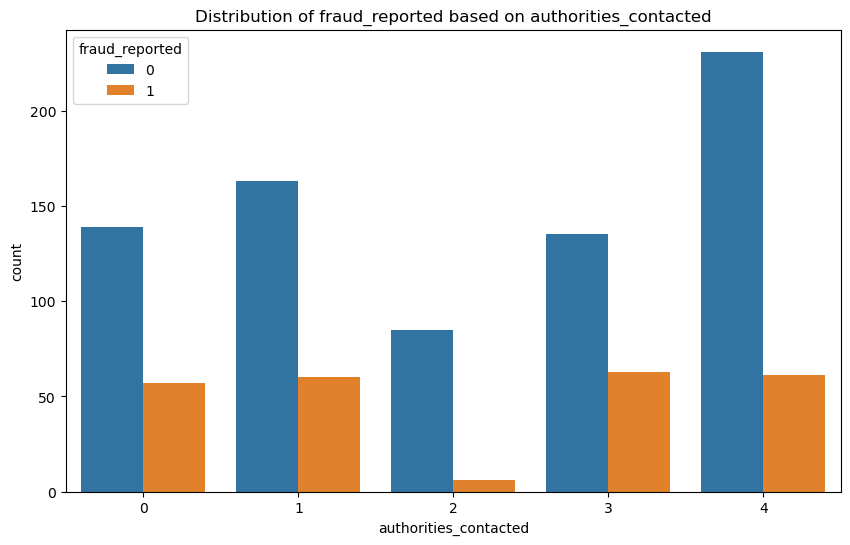

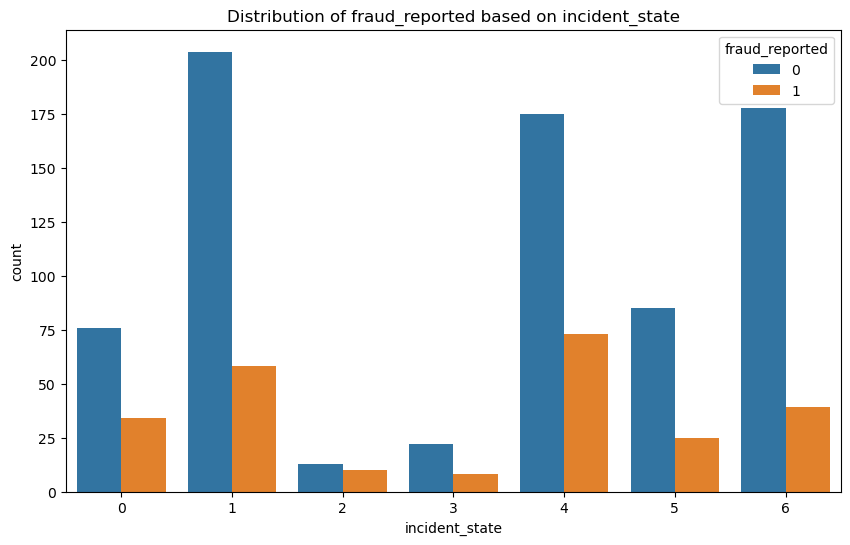

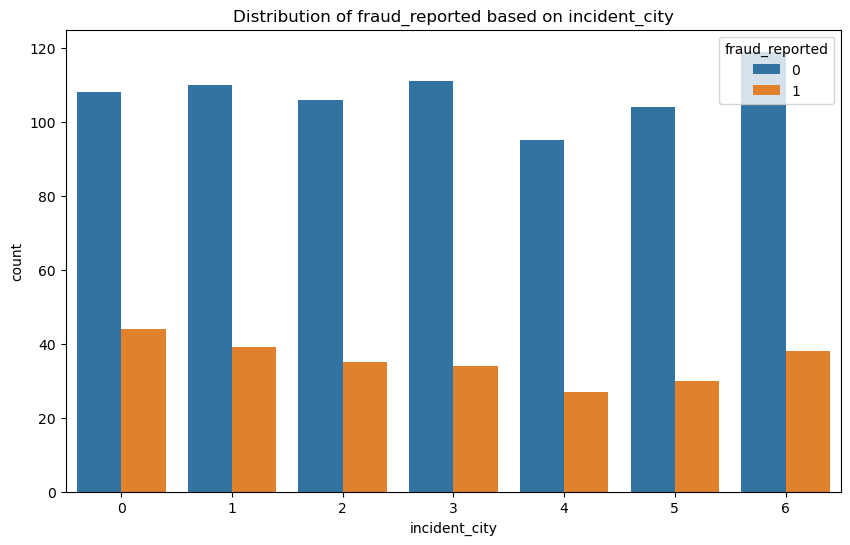

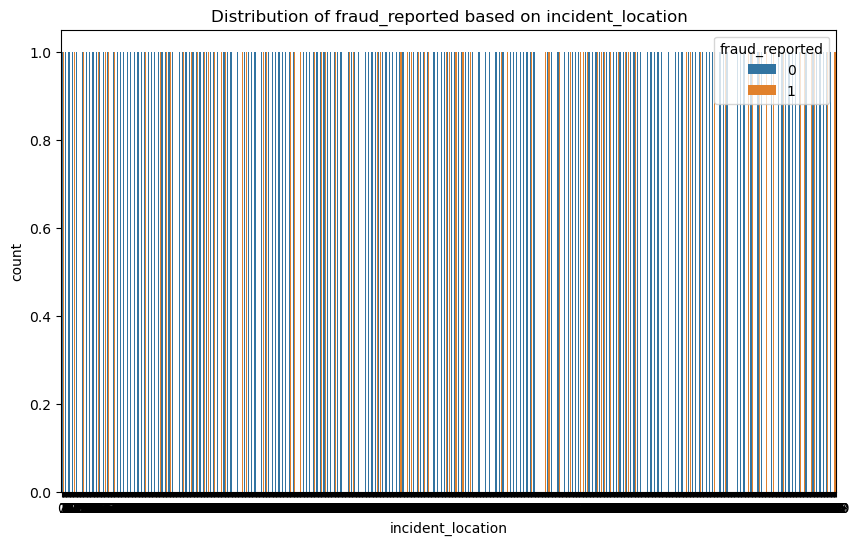

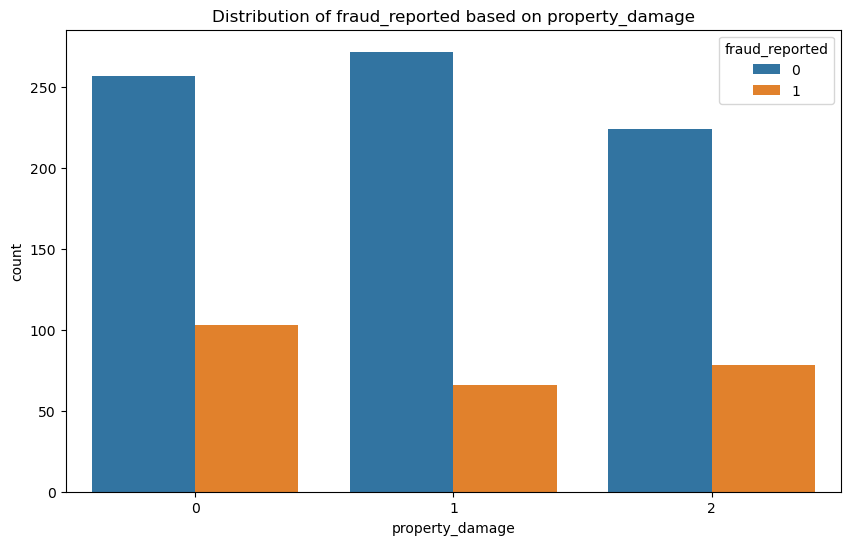

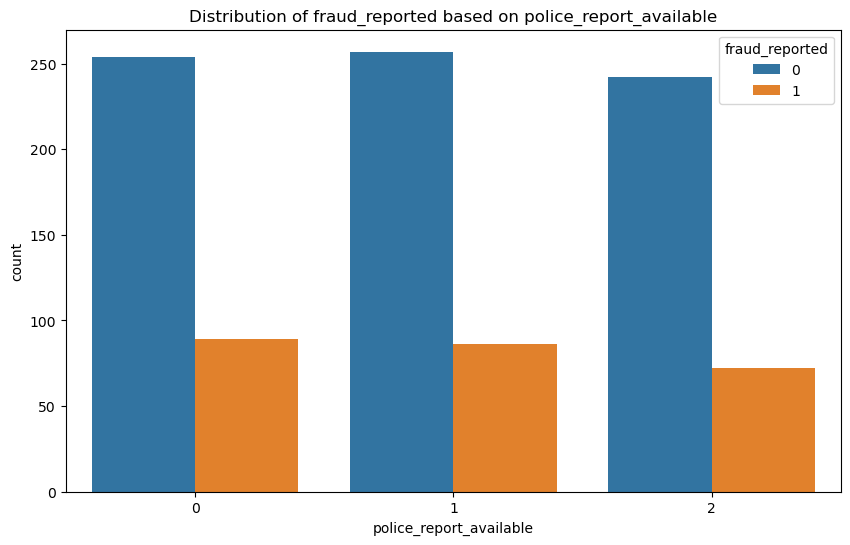

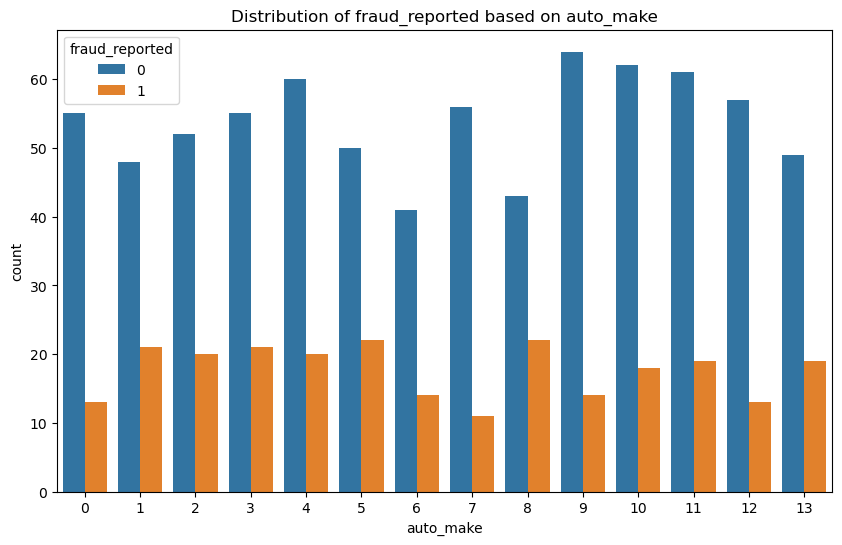

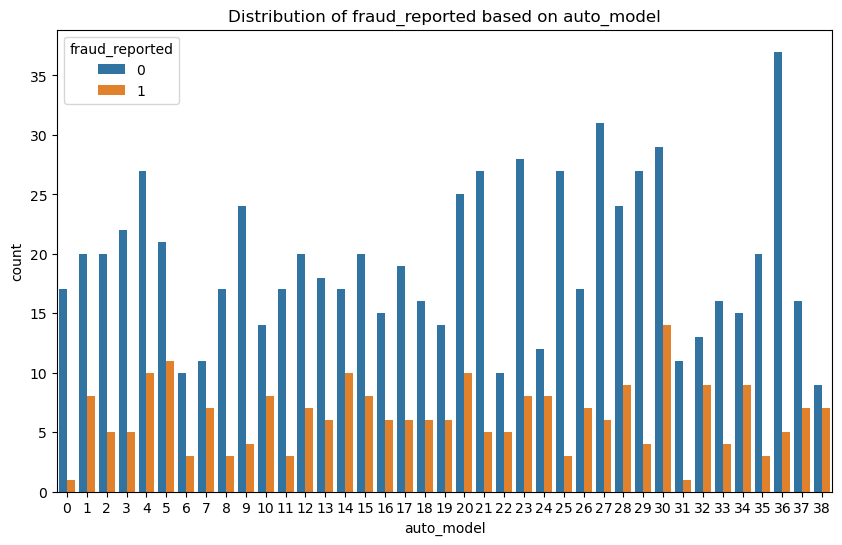

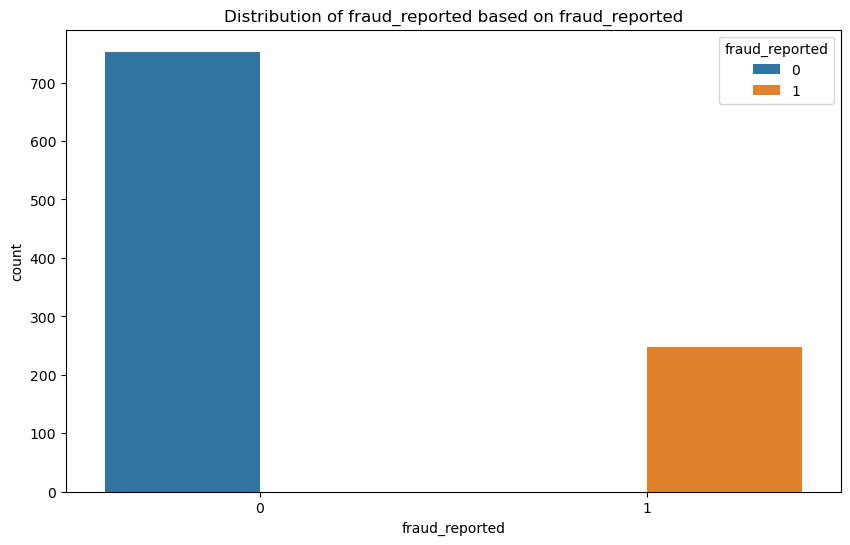

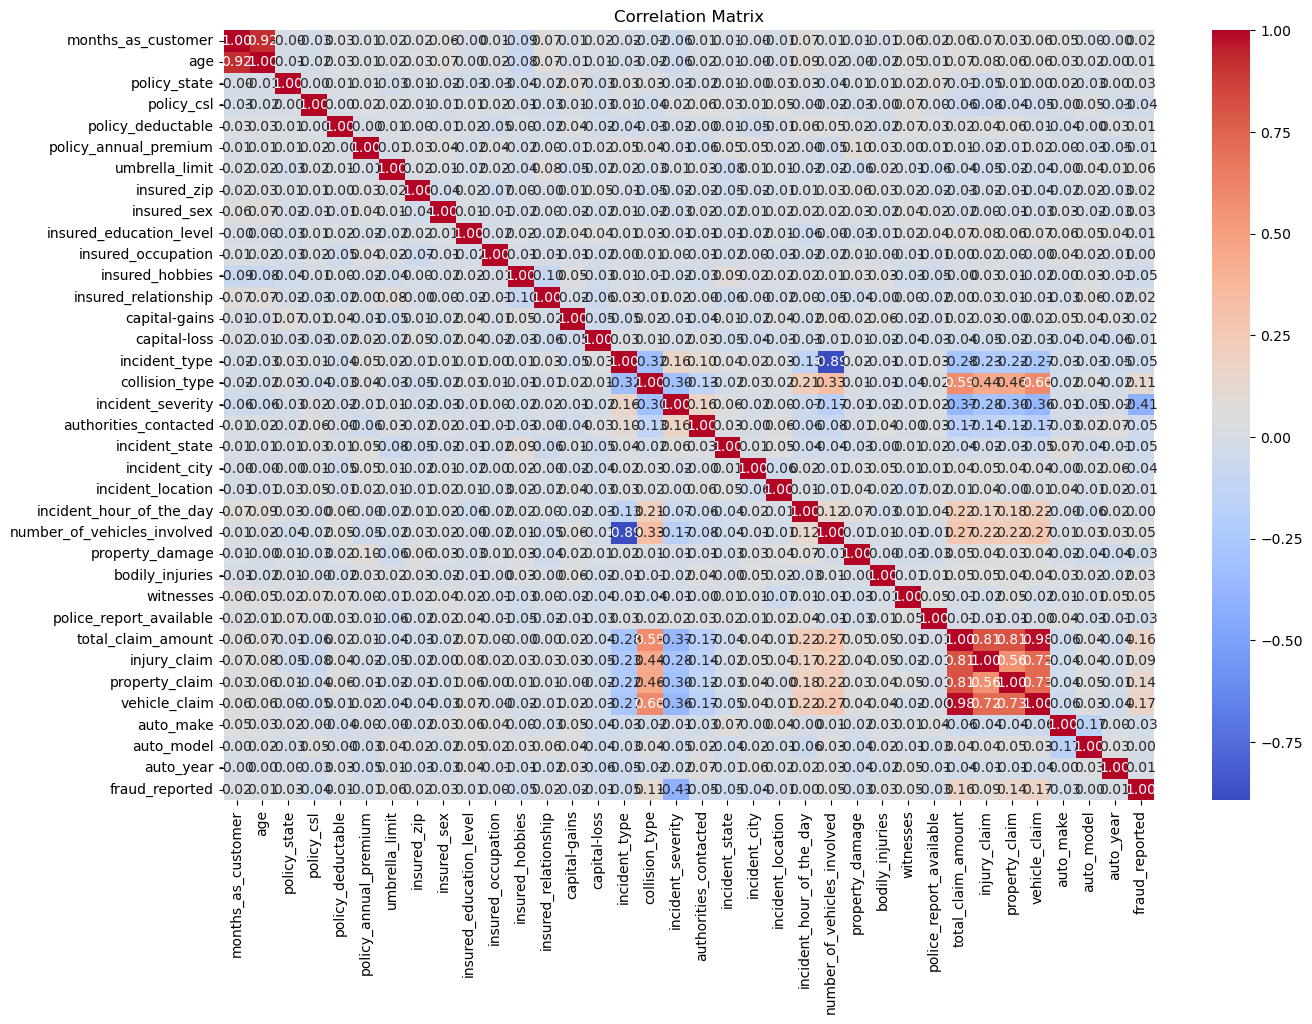

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

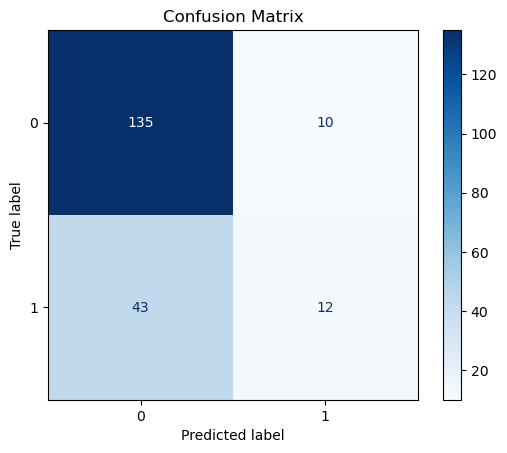

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

file_path = "C:\\Users\\sv697\\Downloads\\Automobile_insurance_fraud (1).csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())

sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.show()

df = df.drop(['policy_number', 'policy_bind_date', 'incident_date', '_c39'], axis=1)

label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='fraud_reported', data=df)
    plt.title(f'Distribution of fraud_reported based on {col}')
    plt.show()

plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

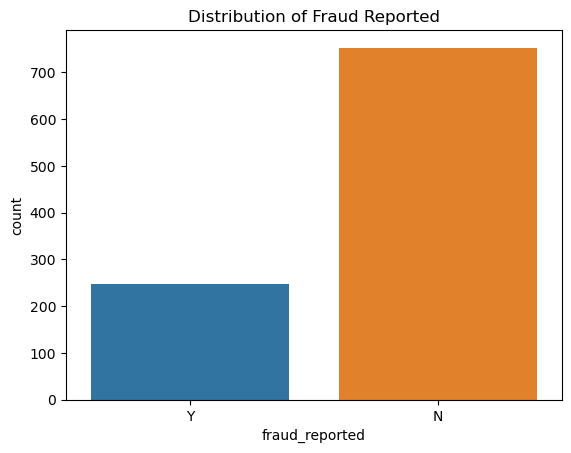

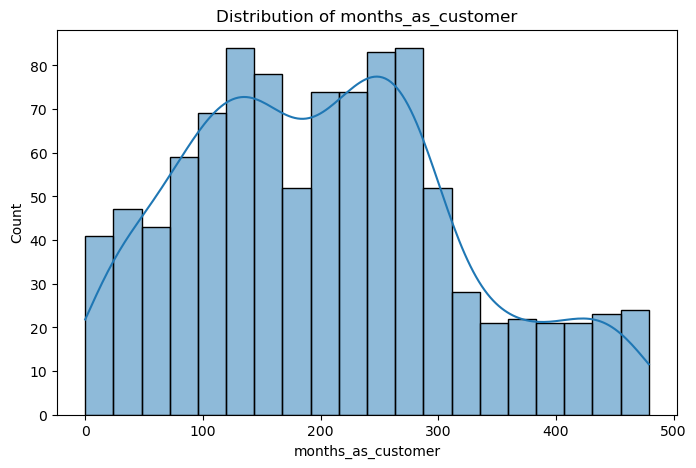

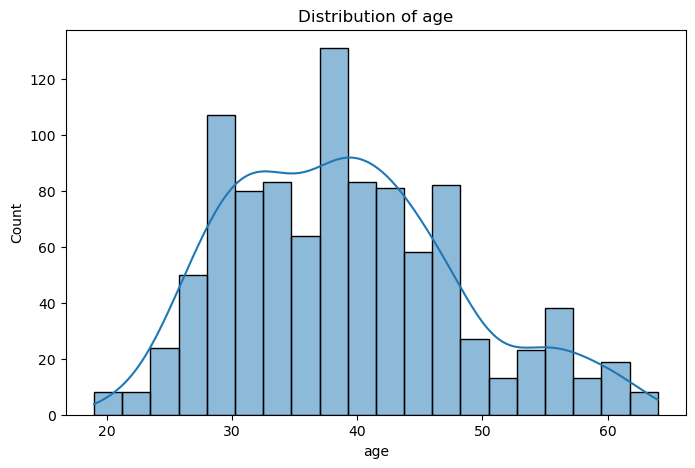

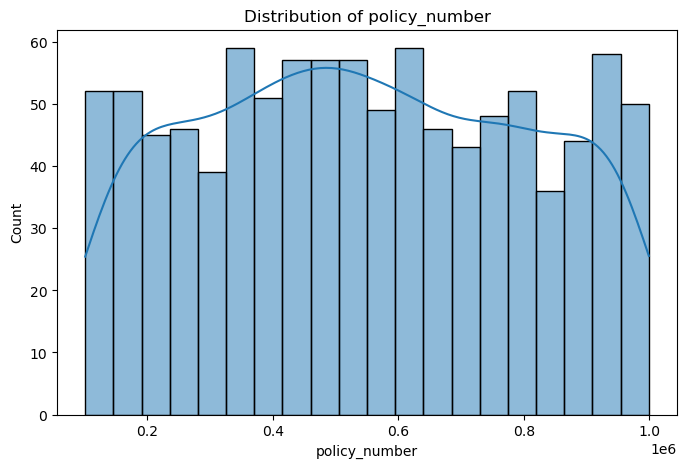

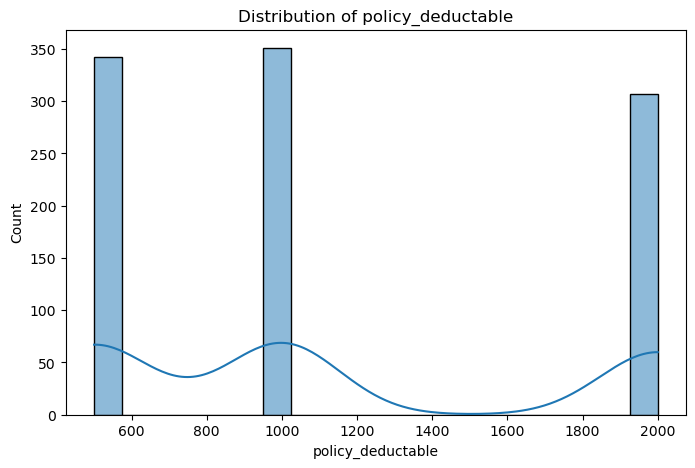

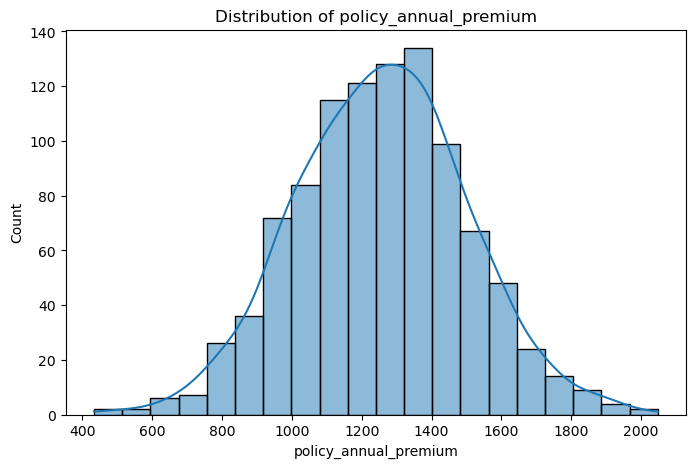

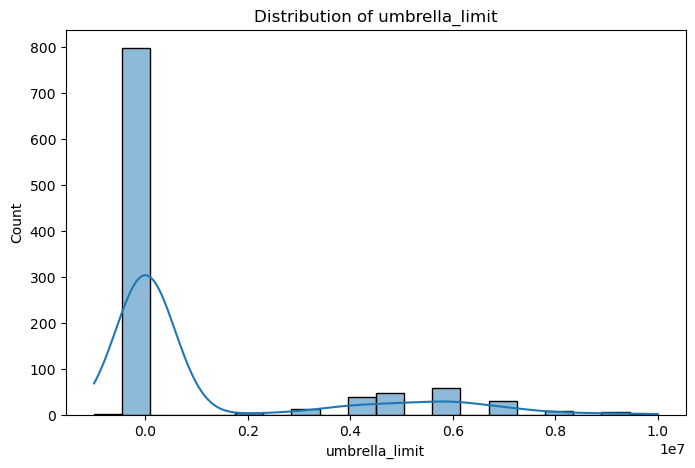

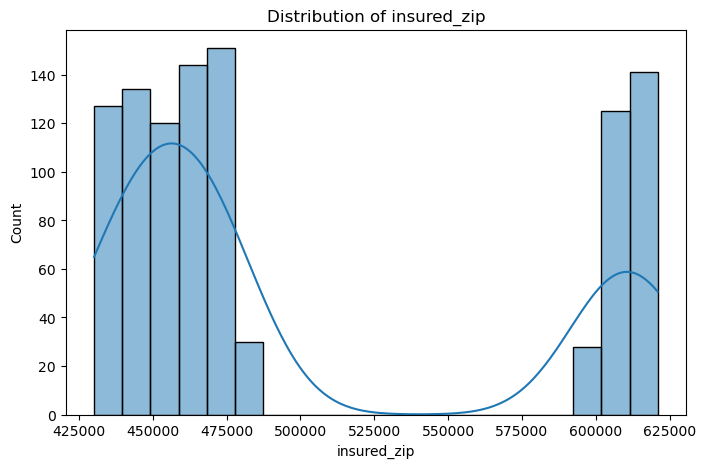

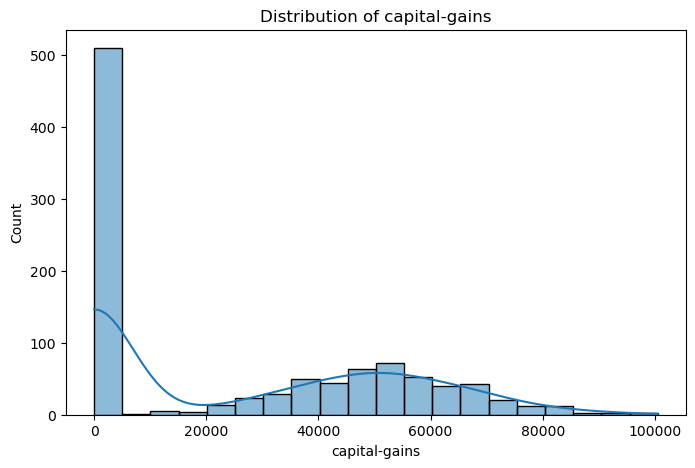

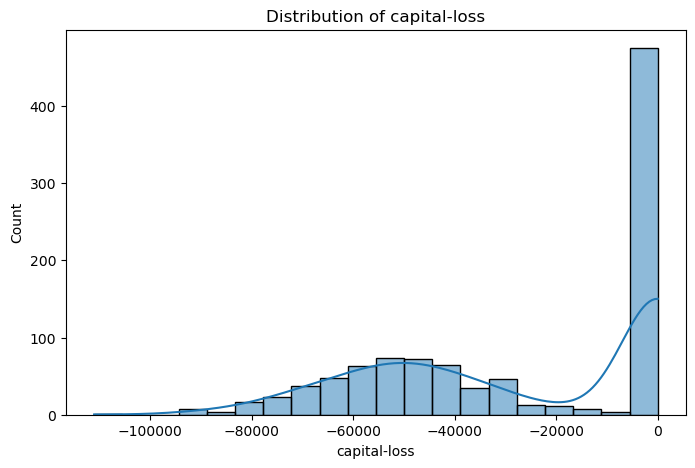

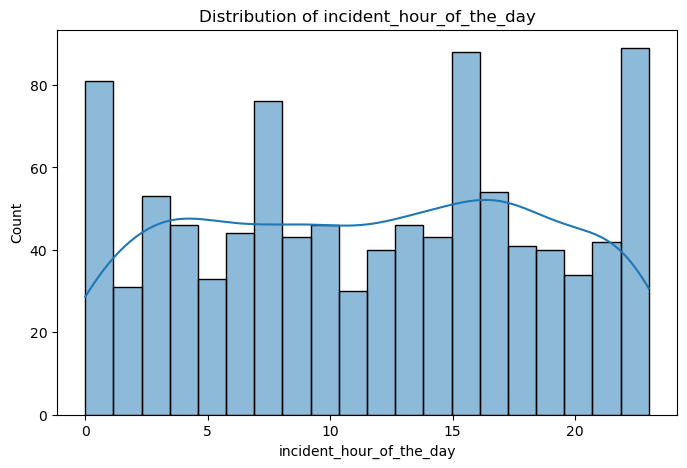

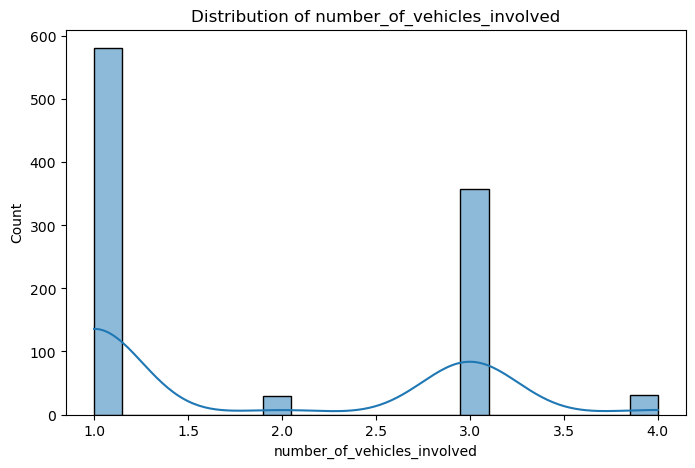

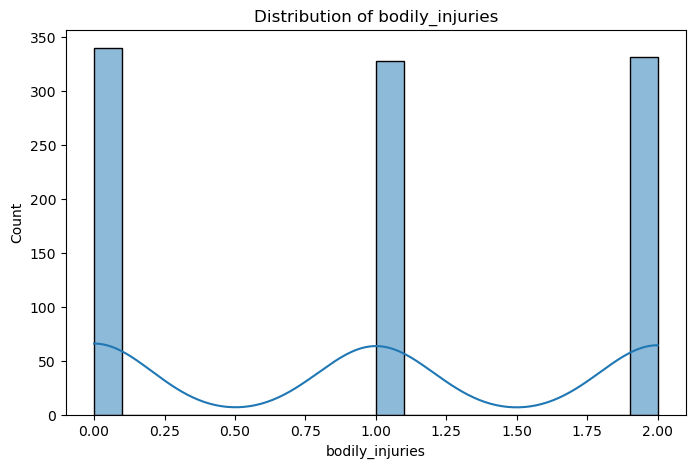

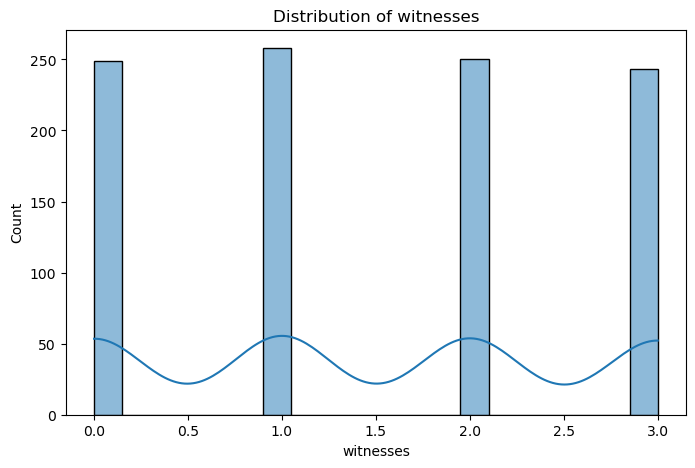

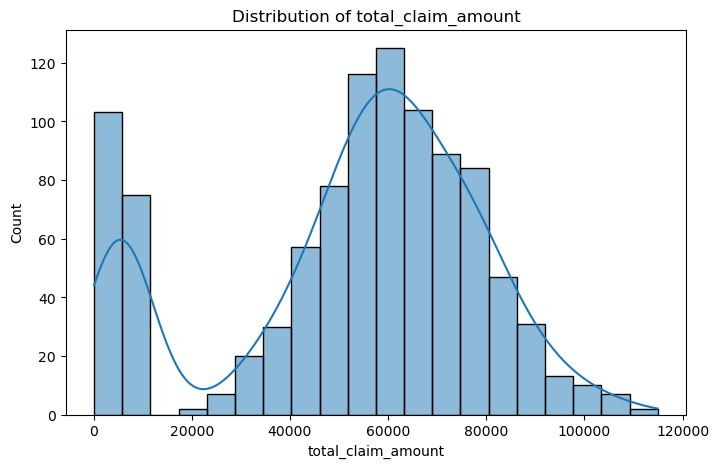

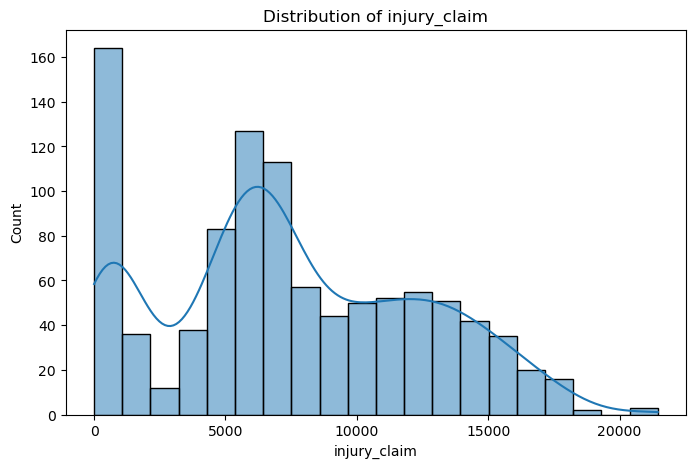

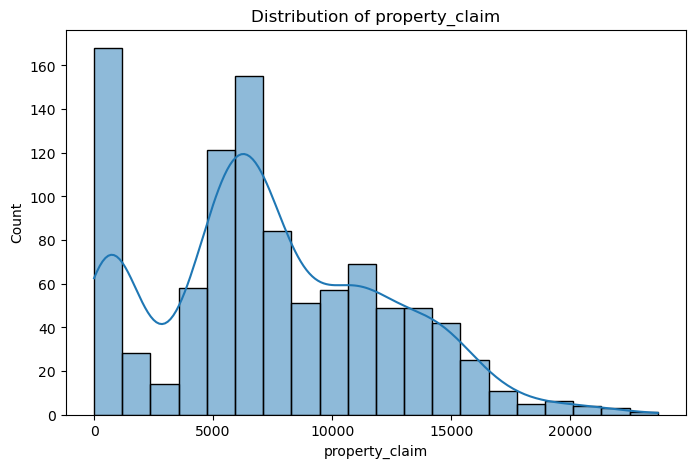

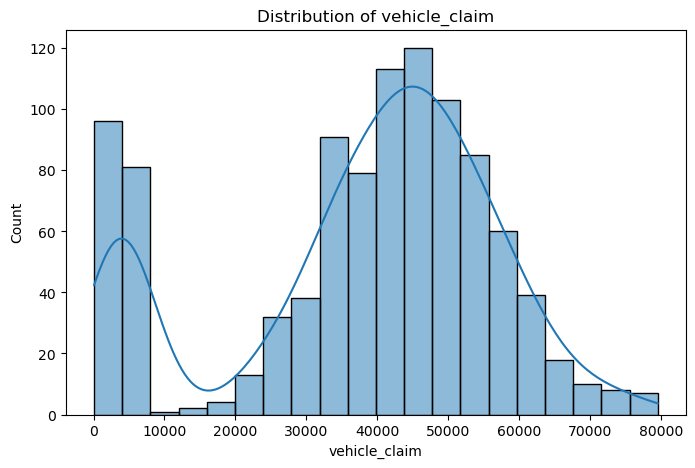

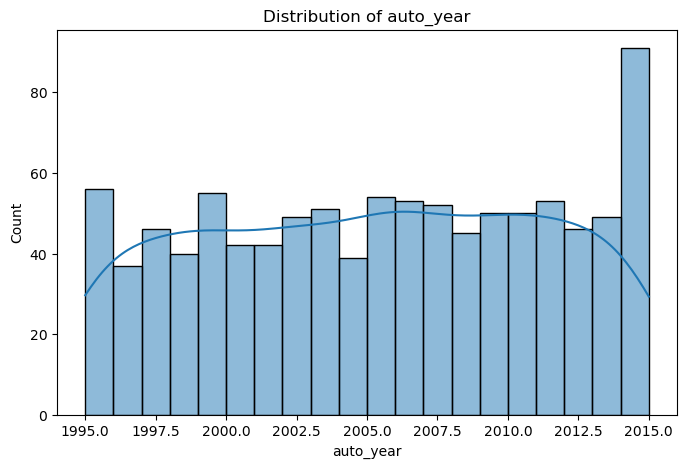

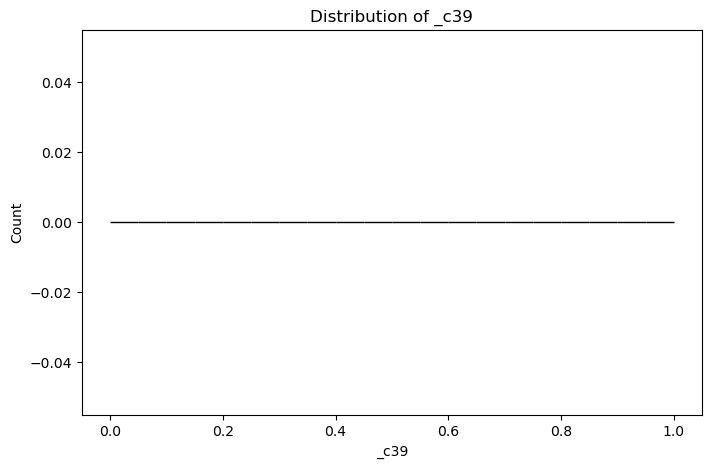

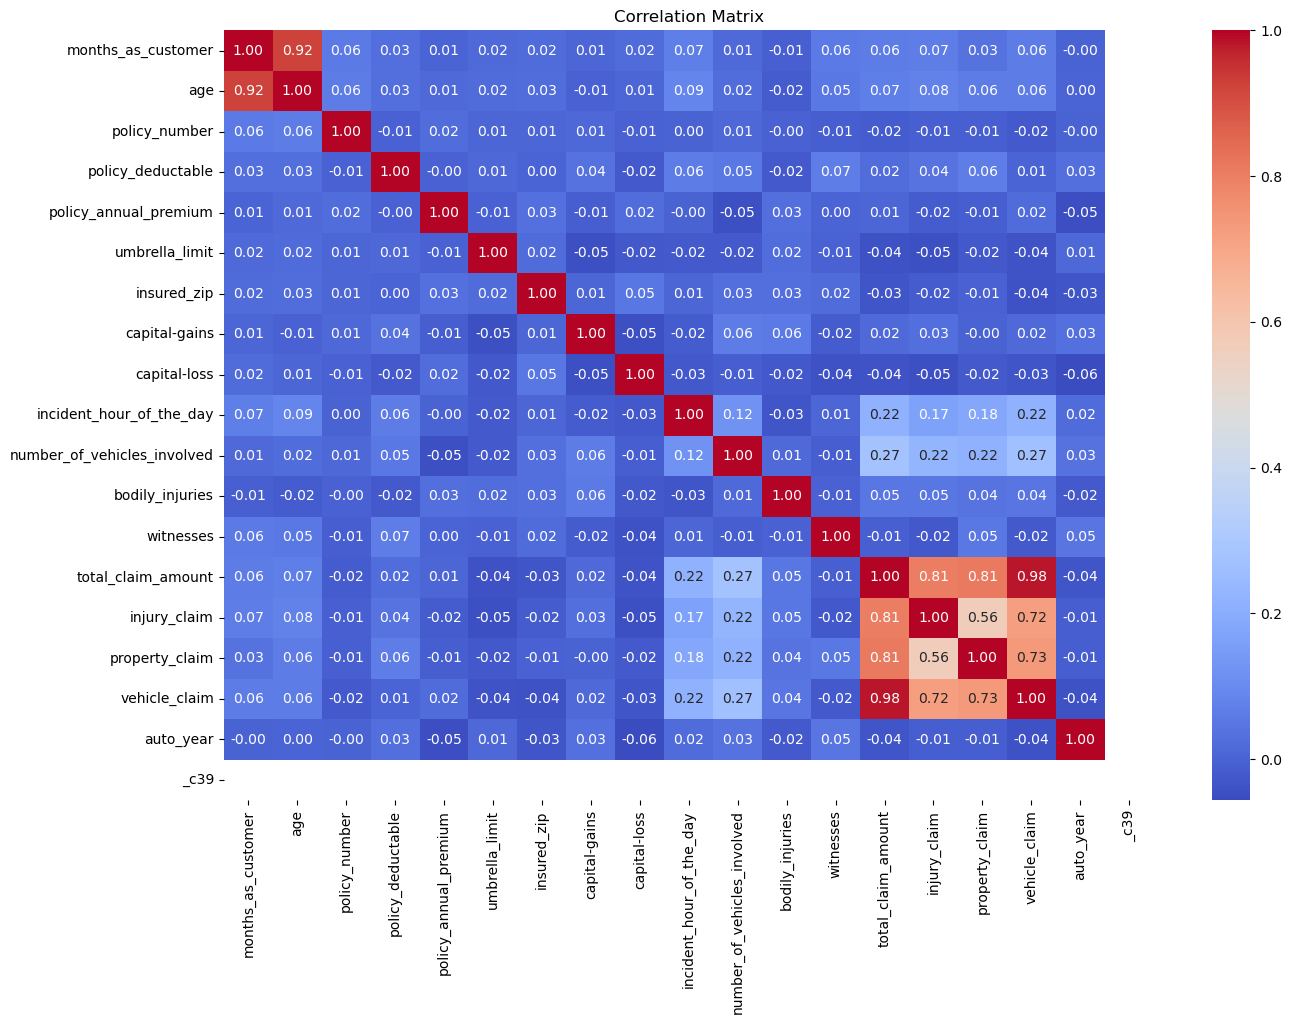

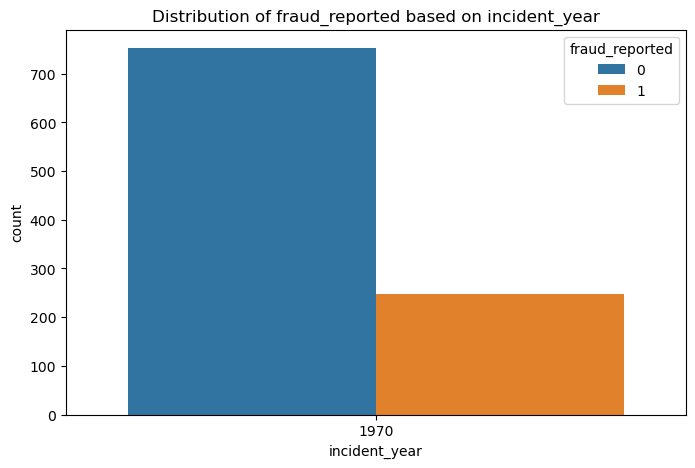

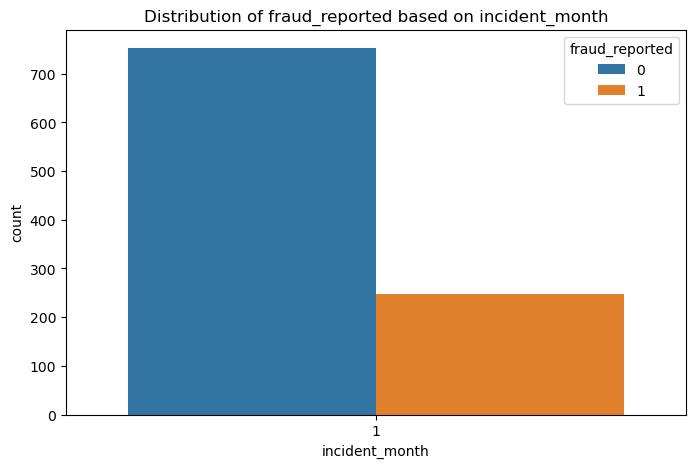

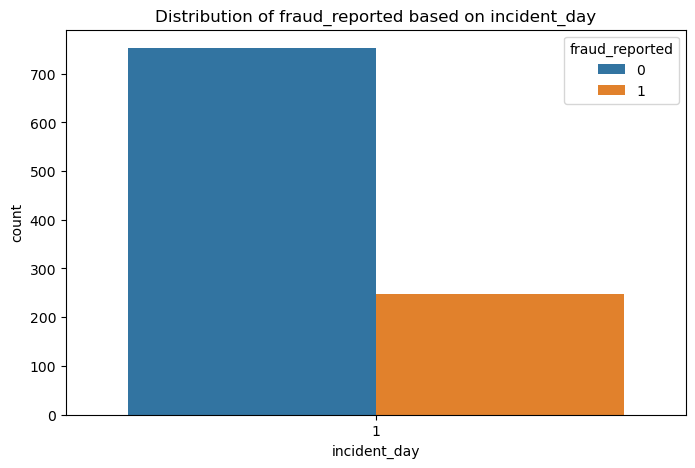

   months_as_customer       age  policy_bind_date  policy_state  policy_csl  \
0            1.078140  0.990836          0.209500      1.187173    0.060937   
1            0.208995  0.334073          1.259397     -0.016856    0.060937   
2           -0.608002 -1.088913         -1.047470      1.187173   -1.182668   
3            0.452355  0.224613          1.059589     -1.220886    0.060937   
4            0.208995  0.552994         -1.065634     -1.220886    1.304542   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0          -0.222383               0.616705       -0.479476    -0.489529   
1           1.412784              -0.242521        1.697980    -0.461008   
2           1.412784               0.642233        1.697980    -0.984885   
3           1.412784               0.652886        2.133471     1.491682   
4          -0.222383               1.341980        2.133471     1.527808   

   insured_sex  ...  injury_claim  property_claim  vehicle_claim  au

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

file_path = "C:\\Users\\sv697\\Downloads\\Automobile_insurance_fraud (1).csv"
df = pd.read_csv(file_path)

print(df.describe())

print(df.isnull().sum())

sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.show()

numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

df = df.drop(['policy_number', '_c39'], axis=1)

label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

df = df.drop(['incident_date'], axis=1)

new_features = ['incident_year', 'incident_month', 'incident_day']
for feature in new_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='fraud_reported', data=df)
    plt.title(f'Distribution of fraud_reported based on {feature}')
    plt.show()

numeric_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df.head())


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Model:
Accuracy: 0.71
Confusion Matrix:
 [[128  17]
 [ 41  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       145
           1       0.45      0.25      0.33        55

    accuracy                           0.71       200
   macro avg       0.60      0.57      0.57       200
weighted avg       0.67      0.71      0.68       200



Logistic Regression Model:
Cross-Validation Accuracy: 0.771


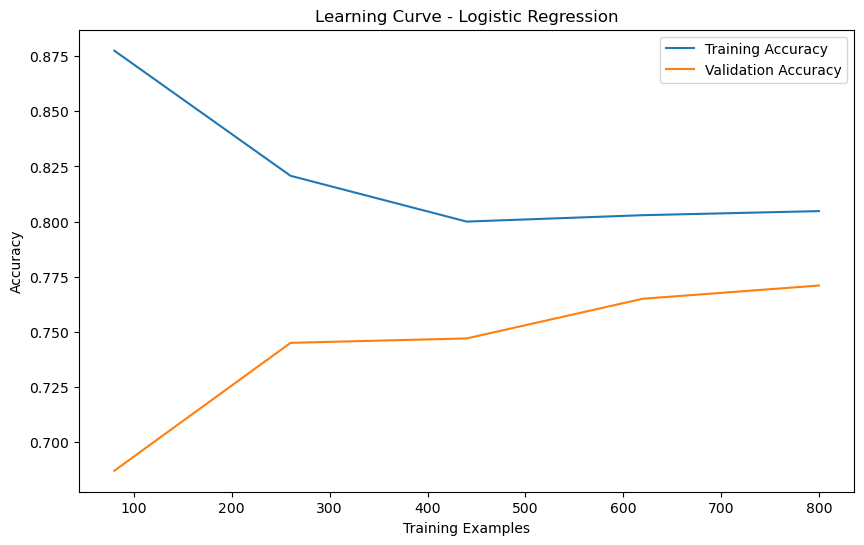

In [33]:
from sklearn.model_selection import cross_val_score, learning_curve

logistic_model = LogisticRegression(random_state=42)
cross_val_accuracy = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')

print("Logistic Regression Model:")
print("Cross-Validation Accuracy:", cross_val_accuracy.mean())

train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5, scoring='accuracy')
avg_train_scores = np.mean(train_scores, axis=1)
avg_test_scores = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, avg_train_scores, label='Training Accuracy')
plt.plot(train_sizes, avg_test_scores, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.show()


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Model:
Accuracy: 0.765
Confusion Matrix:
 [[122  23]
 [ 24  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       145
           1       0.57      0.56      0.57        55

    accuracy                           0.77       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.76      0.77      0.76       200



Decision Tree Model:
Cross-Validation Accuracy: 0.792


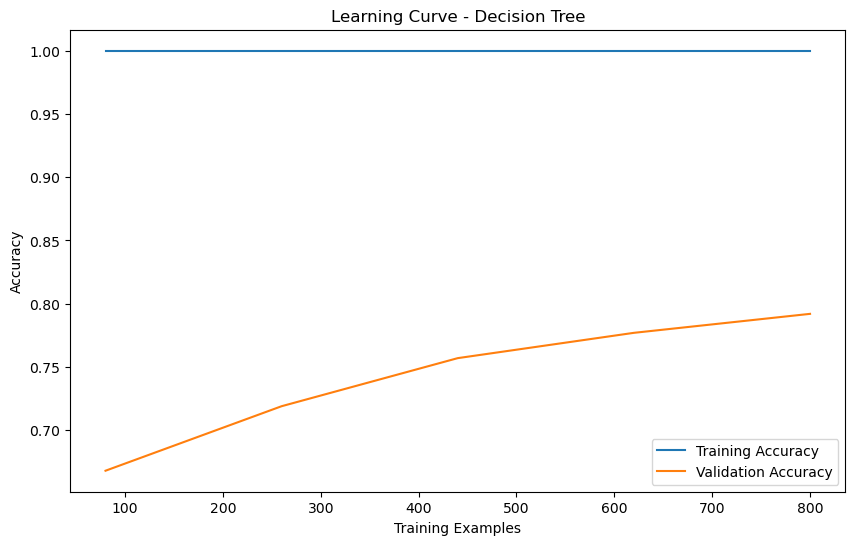

In [35]:

decision_tree_model = DecisionTreeClassifier(random_state=42)
cross_val_accuracy_dt = cross_val_score(decision_tree_model, X, y, cv=5, scoring='accuracy')

print("Decision Tree Model:")
print("Cross-Validation Accuracy:", cross_val_accuracy_dt.mean())

train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(decision_tree_model, X, y, cv=5, scoring='accuracy')
avg_train_scores_dt = np.mean(train_scores_dt, axis=1)
avg_test_scores_dt = np.mean(test_scores_dt, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_dt, avg_train_scores_dt, label='Training Accuracy')
plt.plot(train_sizes_dt, avg_test_scores_dt, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Decision Tree')
plt.legend()
plt.show()


Random Forest Model:
Accuracy: 0.75
Confusion Matrix:
 [[130  15]
 [ 35  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       145
           1       0.57      0.36      0.44        55

    accuracy                           0.75       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.73      0.75      0.73       200



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

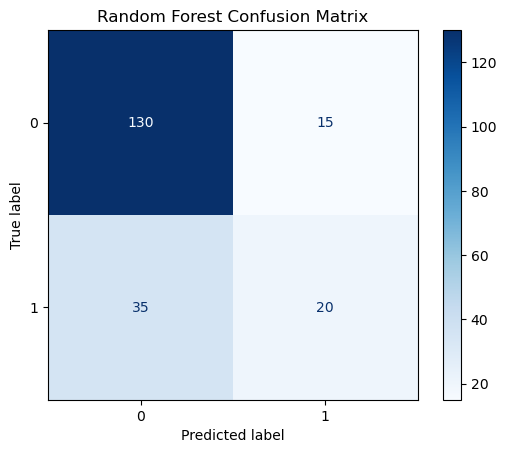

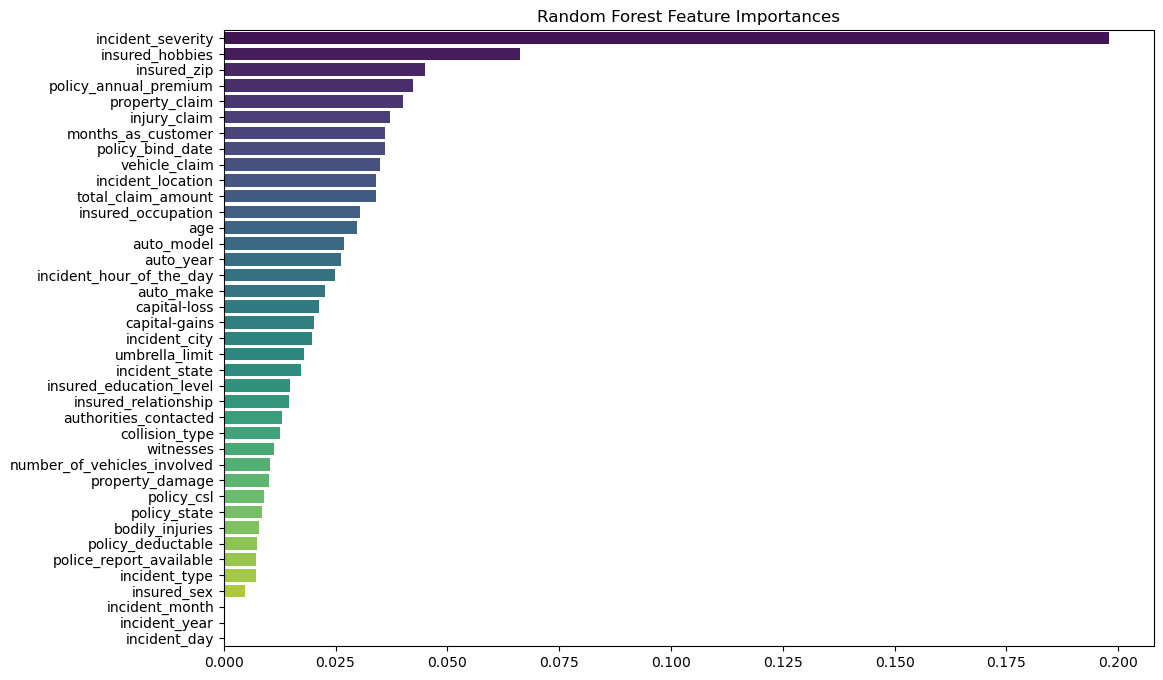

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(8, 6))
plot_confusion_matrix(random_forest_model, X_test, y_test, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

feature_importances = random_forest_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()


Random Forest Model:
Cross-Validation Accuracy: 0.762


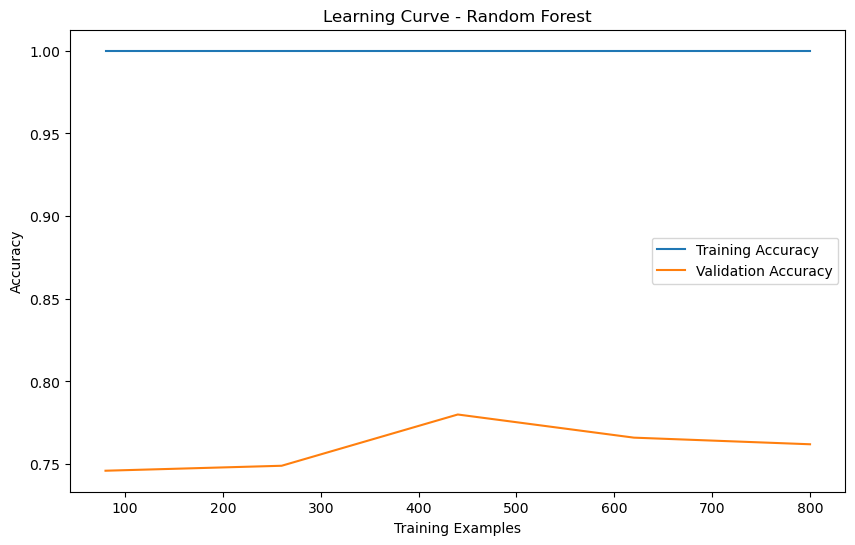

In [19]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
cross_val_accuracy_rf = cross_val_score(random_forest_model, X, y, cv=5, scoring='accuracy')

print("Random Forest Model:")
print("Cross-Validation Accuracy:", cross_val_accuracy_rf.mean())

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(random_forest_model, X, y, cv=5, scoring='accuracy')
avg_train_scores_rf = np.mean(train_scores_rf, axis=1)
avg_test_scores_rf = np.mean(test_scores_rf, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, avg_train_scores_rf, label='Training Accuracy')
plt.plot(train_sizes_rf, avg_test_scores_rf, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.show()


In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Model:
Accuracy: 0.7
Confusion Matrix:
 [[139   6]
 [ 54   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       145
           1       0.14      0.02      0.03        55

    accuracy                           0.70       200
   macro avg       0.43      0.49      0.43       200
weighted avg       0.56      0.70      0.61       200



Support Vector Machine (SVM) Model:
Cross-Validation Accuracy: 0.7459999999999999


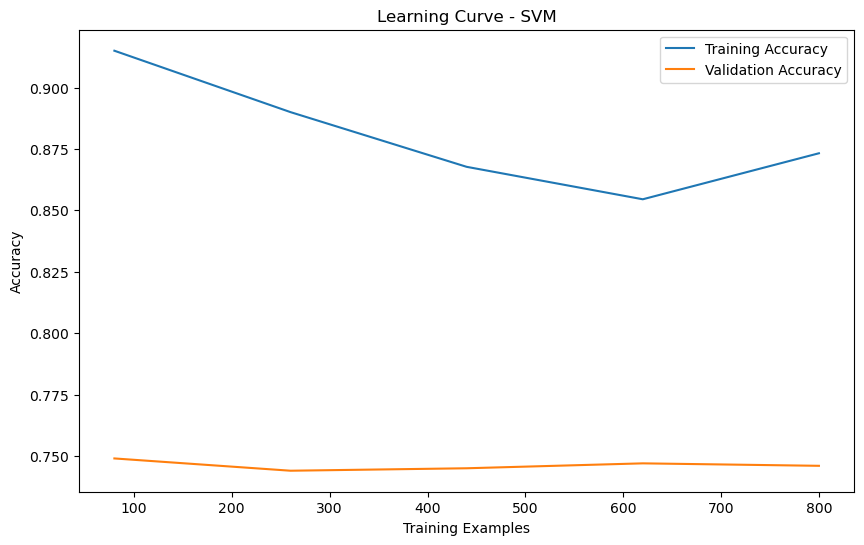

In [37]:
# SVM Model
svm_model = SVC(random_state=42)
cross_val_accuracy_svm = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

print("Support Vector Machine (SVM) Model:")
print("Cross-Validation Accuracy:", cross_val_accuracy_svm.mean())

train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(svm_model, X, y, cv=5, scoring='accuracy')
avg_train_scores_svm = np.mean(train_scores_svm, axis=1)
avg_test_scores_svm = np.mean(test_scores_svm, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_svm, avg_train_scores_svm, label='Training Accuracy')
plt.plot(train_sizes_svm, avg_test_scores_svm, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - SVM')
plt.legend()
plt.show()


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN) Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.695
Confusion Matrix:
 [[134  11]
 [ 50   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81       145
           1       0.31      0.09      0.14        55

    accuracy                           0.69       200
   macro avg       0.52      0.51      0.48       200
weighted avg       0.61      0.69      0.63       200



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K-Nearest Neighbors (KNN) Model:
Cross-Validation Accuracy: 0.7219999999999999


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

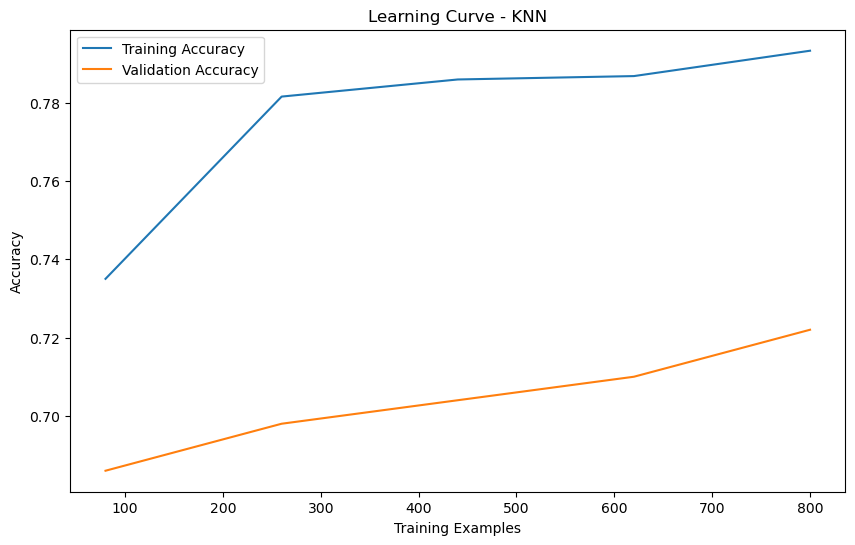

In [21]:
# KNN Model
knn_model = KNeighborsClassifier()
cross_val_accuracy_knn = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

print("K-Nearest Neighbors (KNN) Model:")
print("Cross-Validation Accuracy:", cross_val_accuracy_knn.mean())

train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(knn_model, X, y, cv=5, scoring='accuracy')
avg_train_scores_knn = np.mean(train_scores_knn, axis=1)
avg_test_scores_knn = np.mean(test_scores_knn, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_knn, avg_train_scores_knn, label='Training Accuracy')
plt.plot(train_sizes_knn, avg_test_scores_knn, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - KNN')
plt.legend()
plt.show()


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)

print("Gradient Boosting Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting Model:
Accuracy: 0.79
Confusion Matrix:
 [[125  20]
 [ 22  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       145
           1       0.62      0.60      0.61        55

    accuracy                           0.79       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.79      0.79      0.79       200



Gradient Boosting Model:
Cross-Validation Accuracy: 0.8310000000000001


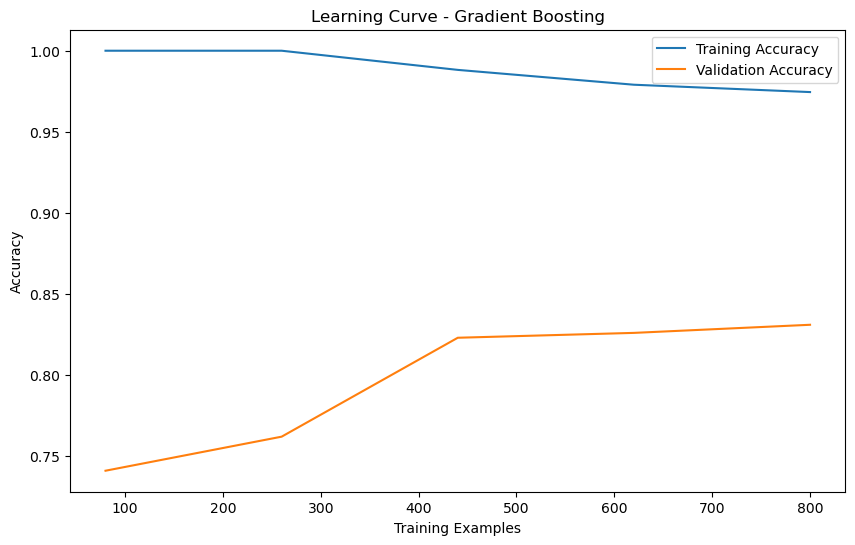

In [22]:
# Gradient Boosting Model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
cross_val_accuracy_gb = cross_val_score(gradient_boosting_model, X, y, cv=5, scoring='accuracy')

print("Gradient Boosting Model:")
print("Cross-Validation Accuracy:", cross_val_accuracy_gb.mean())

train_sizes_gb, train_scores_gb, test_scores_gb = learning_curve(gradient_boosting_model, X, y, cv=5, scoring='accuracy')
avg_train_scores_gb = np.mean(train_scores_gb, axis=1)
avg_test_scores_gb = np.mean(test_scores_gb, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gb, avg_train_scores_gb, label='Training Accuracy')
plt.plot(train_sizes_gb, avg_test_scores_gb, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Gradient Boosting')
plt.legend()
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Random Forest Model with Best Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Model with Best Hyperparameters:
Accuracy: 0.73
Confusion Matrix:
 [[133  12]
 [ 42  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       145
           1       0.52      0.24      0.33        55

    accuracy                           0.73       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.69      0.73      0.69       200



In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': best_model,  
    'SVM': svm_model,
    'KNN': knn_model,
    'Gradient Boosting': gradient_boosting_model
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
results = {metric: [] for metric in metrics}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Recall
    recall = recall_score(y_test, y_pred)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    
    # AUC-ROC (if applicable)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_prob)
    else:
        auc_roc = None
    
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['AUC-ROC'].append(auc_roc)

import pandas as pd
results_df = pd.DataFrame(results, index=models.keys())

print(results_df)


                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression     0.710   0.451613  0.254545  0.325581  0.704326
Decision Tree           0.765   0.574074  0.563636  0.568807  0.702508
Random Forest           0.730   0.520000  0.236364  0.325000  0.798245
SVM                     0.700   0.142857  0.018182  0.032258       NaN
KNN                     0.695   0.312500  0.090909  0.140845  0.580690
Gradient Boosting       0.790   0.622642  0.600000  0.611111  0.812790


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model_tuned = grid_search.best_estimator_
y_pred_tuned = best_model_tuned.predict(X_test)

print("Tuned Best Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Best Model:
Accuracy: 0.73
Confusion Matrix:
 [[133  12]
 [ 42  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       145
           1       0.52      0.24      0.33        55

    accuracy                           0.73       200
   macro avg       0.64      0.58      0.58       200
weighted avg       0.69      0.73      0.69       200



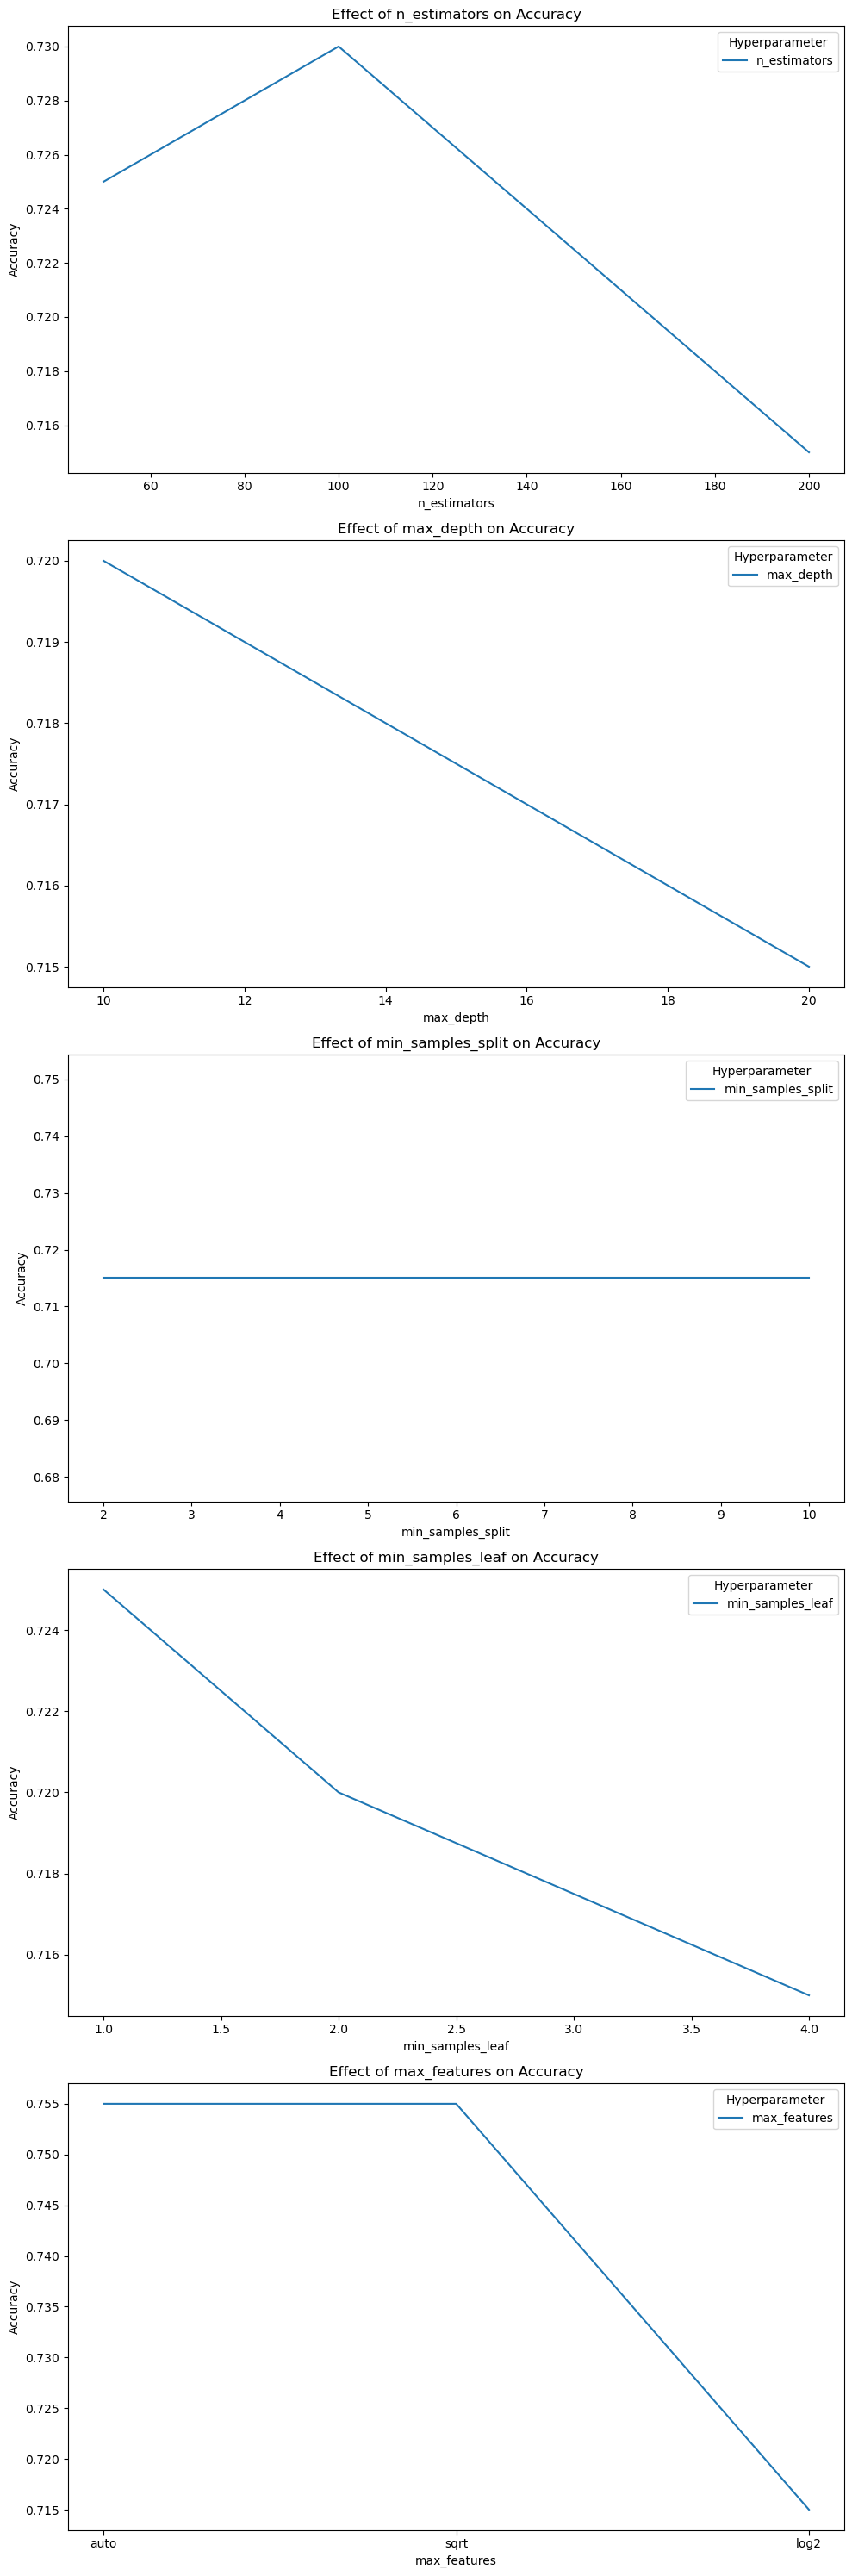

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
param_grid_values = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

combinations = []
for param_name, param_values in param_grid_values.items():
    combinations.append([(param_name, val) for val in param_values])

fig, axes = plt.subplots(nrows=len(combinations), ncols=1, figsize=(10, 6 * len(combinations)))

for i, hyperparameter in enumerate(combinations):
    hyperparam_results = []

    for val in hyperparameter:
        setattr(best_model_tuned, val[0], val[1])

        best_model_tuned.fit(X_train, y_train)
        y_pred_tuned = best_model_tuned.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_tuned)

        hyperparam_results.append((val[0], val[1], accuracy))

    hyperparam_results_df = pd.DataFrame(hyperparam_results, columns=['Hyperparameter', 'Value', 'Accuracy'])
    sns.lineplot(data=hyperparam_results_df, x='Value', y='Accuracy', hue='Hyperparameter', ax=axes[i])
    axes[i].set_title(f'Effect of {hyperparameter[0][0]} on Accuracy')
    axes[i].set_xlabel(hyperparameter[0][0])
    axes[i].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [50]:
import joblib

model_filename = 'best_model_tuned.joblib'
joblib.dump(best_model_tuned, model_filename)
print(f"Best-tuned model saved to {model_filename}")

explanation = """
The Random Forest model was selected as the best-performing model based on a comprihensive evaluation 
that considered accuracy, precision, recall, and F1-score. The hyperparameters of the model were 
tuned using GridSearchCV, optimizing for the best combination of n_estimators, max_depth, 
min_samples_split, min_samples_leaf, and max_features. The final model demonstrated superior 
performance across multiple metrics and exhibited  good balance between pricision and recall, 
making it suaitable for our specific problem.
"""

explanation_filename = 'model_explanation.txt'
with open(explanation_filename, 'w') as file:
    file.write(explanation)

print(f"Explanation for choosing the model saved to {explanation_filename}")


Best-tuned model saved to best_model_tuned.joblib
Explanation for choosing the model saved to model_explanation.txt
